# TIME SERIES

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from sklearn.metrics import mean_squared_error

import warnings
import itertools
warnings.filterwarnings("ignore")

#matplotlib 패키지 한글 설정 시작
from matplotlib import rc
rc('font', family='Apple Gothic') 
#matplotlib 패키지 한글 설정 끝

## AR model

findfont: Font family ['Apple Gothic'] not found. Falling back to DejaVu Sans.


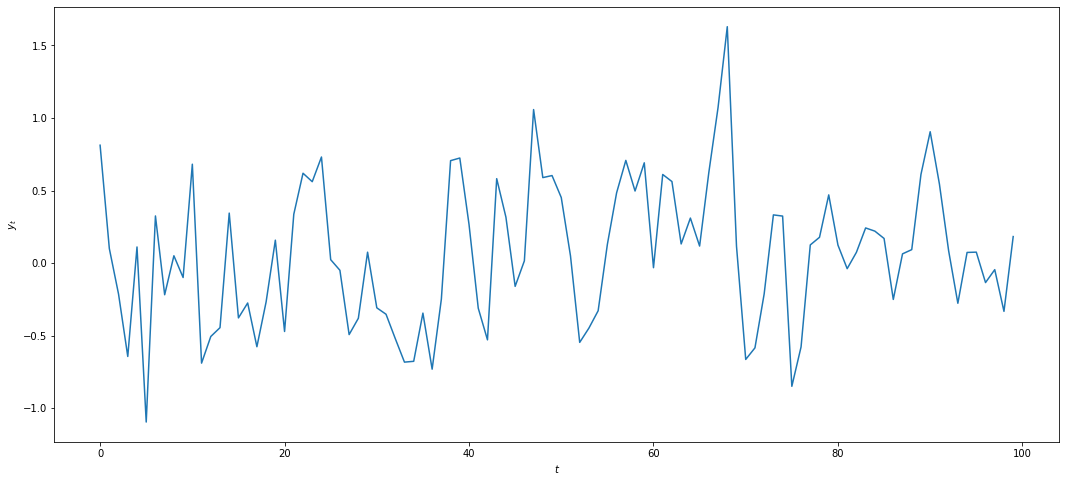

In [72]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1, -0.5]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale = 0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


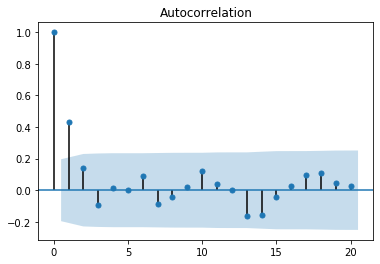

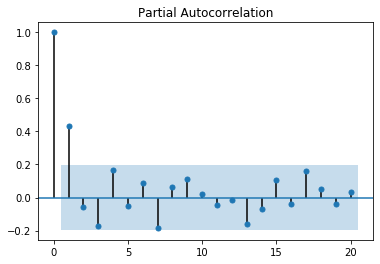

In [3]:
# acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_acf(y)
fig = plot_pacf(y)

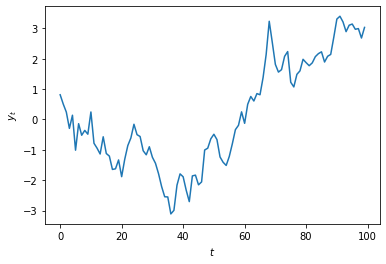

In [4]:
#random walk 모형
np.random.seed(1)

# Set coefficients
ar_coefs = [1, -1]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale = 0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

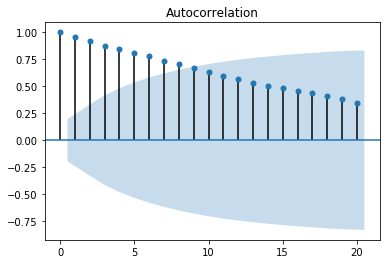

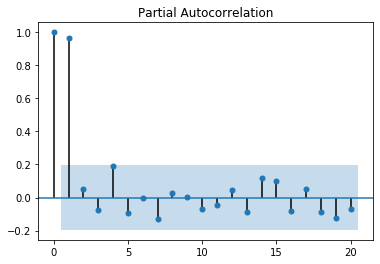

In [5]:
#random walk
fig = plot_acf(y)
fig = plot_pacf(y)

In [6]:
# adfuller test - 단위근검정
sm.tsa.stattools.adfuller(y)[1] # p.value
# p.value가 0.01이하이므로 H0(계수가 1이다) 기각 불가능
# 차수가 1이 있다.

0.842894089660846

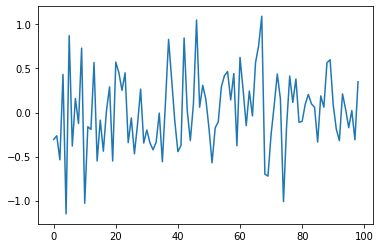

In [7]:
# 일차차분
diff_y = y[1:] - y[:-1]
plt.plot(diff_y)
plt.show()

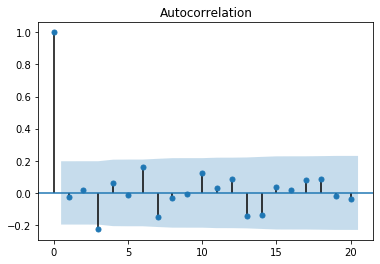

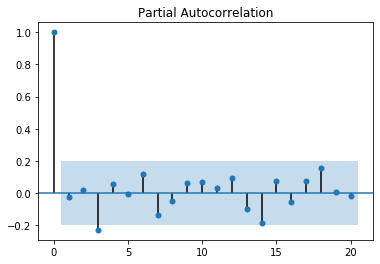

In [8]:
#random walk
fig = plot_acf(diff_y)
fig = plot_pacf(diff_y)

## MA model

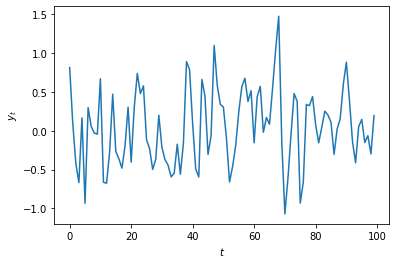

In [9]:
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, 0.5]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale = 0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

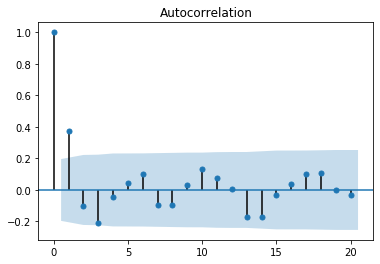

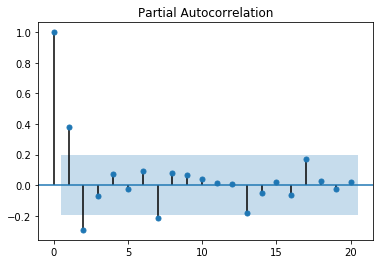

In [10]:
fig = plot_acf(y)
fig = plot_pacf(y)

## ARMA model

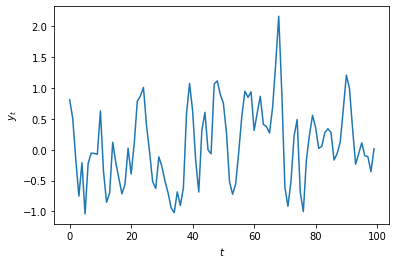

In [11]:
np.random.seed(1)

# Set coefficients
ar_coefs = [1, -0.5]
ma_coefs = [1, 0.5]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale = 0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

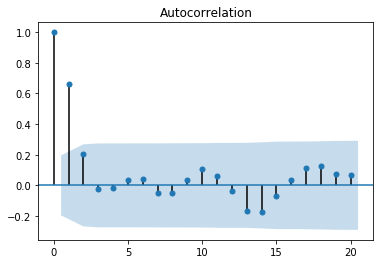

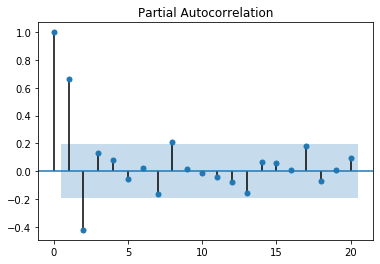

In [12]:
fig = plot_acf(y)
fig = plot_pacf(y)

In [13]:
# 간단한 모수 예측
model = statsmodels.tsa.arima_model.ARIMA(y, (1, 0, 1)).fit(trend='nc', disp=0)
model.params

array([0.47227397, 0.46524064])

## 시계열 모형 적합

In [14]:
# 서버에서 데이터 받기
# 월, 승객수의 데이터
df = pd.read_csv('https://raw.githubusercontent.com/ivanarielcaceres/timeseries-lstm-keras/master/data/international-airline-passengers.csv')

In [15]:
df

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


In [16]:
# 간단한 전처리
df = df.dropna()
print(df.head(), df.tail())

     Month  Passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0        Month  Passengers
139  1960-08       606.0
140  1960-09       508.0
141  1960-10       461.0
142  1960-11       390.0
143  1960-12       432.0


In [17]:
# 데이터 타입 확인
df.dtypes

Month          object
Passengers    float64
dtype: object

In [18]:
# 혹은
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


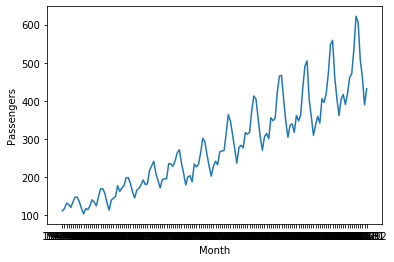

In [19]:
# 시각화
sns.lineplot(x='Month', y='Passengers', data=df)
plt.show()

# Month가 데이터 타입을 시간으로 처리해주면 해결

In [20]:
# 날짜 변수는 datetime 형식으로 바꿔주는게 다루기 쉽습니다

df["Month"] = pd.to_datetime(df["Month"])
y = df.set_index("Month")

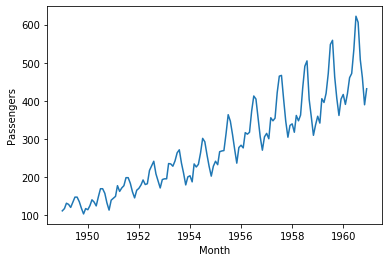

In [21]:
# 시각화
sns.lineplot(x='Month', y='Passengers', data=df)
plt.show()

# Month가 데이터 타입을 시간으로 처리해주면 해결

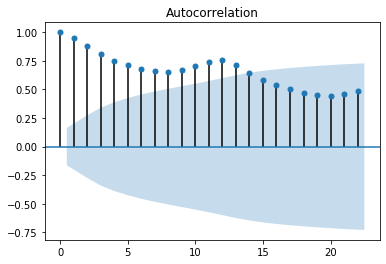

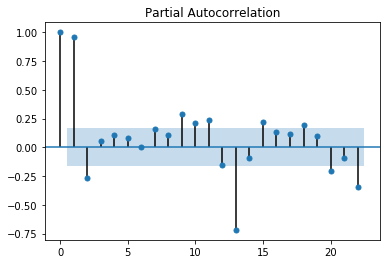

In [22]:
fig = plot_acf(y)
fig = plot_pacf(y)

In [23]:
# adfuller test - 단위근검정
result = sm.tsa.stattools.adfuller(y, maxlag = 1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# p-value 0.15
# 애매한 수치 H_0 기각 불가능 하지만, 그렇다고 단위근이 존재한다고 할 수 없다.
# 차수가 1이 있다.

ADF Statistic: -2.345027
p-value: 0.157857
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [24]:
# adfuller test - 단위근검정
result = sm.tsa.stattools.adfuller(y, maxlag = 12)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# p-value 0.99
# H_0 기각 불가능
# 차수가 1이 있다.

ADF Statistic: 1.564685
p-value: 0.997748
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579


### log-transformation

In [25]:
# 뒤로 갈수록 fluctuation 이 커진다. 보통 box-cox 변환, 혹은 log를 사용합니다. 특히 revenue와 같이 단위가 크게 변하는 경우
y = np.log(y)

# 하지만 원래의 수치로 prediction할때는 다시 re-transform해야하므로 불확실성이 오히려 증가하고
# 그래서 원 수치에 맞는 model을 찾는게 제일 베스트 입니다.
# 그래도 통계 방법론 중 하나이므로 acf, pacf를 구해보면.

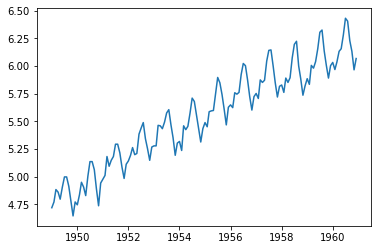

In [26]:
plt.plot(y)
plt.show()

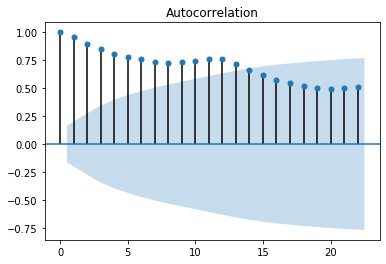

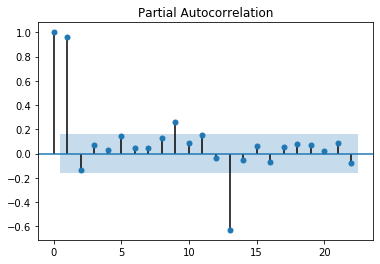

In [27]:
fig = plot_acf(y)
fig = plot_pacf(y)

In [28]:
# 12개월, 즉 1년의 주기성을 파악할 수 있습니다.
# 그리고 pacf에서 lag 1에서 1에 근접 -> 단위 근검정

In [49]:
# adfuller test - 단위근검정
result = sm.tsa.stattools.adfuller(y, maxlag = 12)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# p.value가 0.01이하이므로 H0(계수가 1이다) 기각 불가능
# 차수가 1이 있다.

ADF Statistic: -1.951978
p-value: 0.308018
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579


In [50]:
# adfuller test - 단위근검정
result = sm.tsa.stattools.adfuller(y, maxlag = 1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# p.value가 0.01이하이므로 H0(계수가 1이다) 기각 불가능
# 차수가 1이 있다.

ADF Statistic: -2.018492
p-value: 0.278524
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


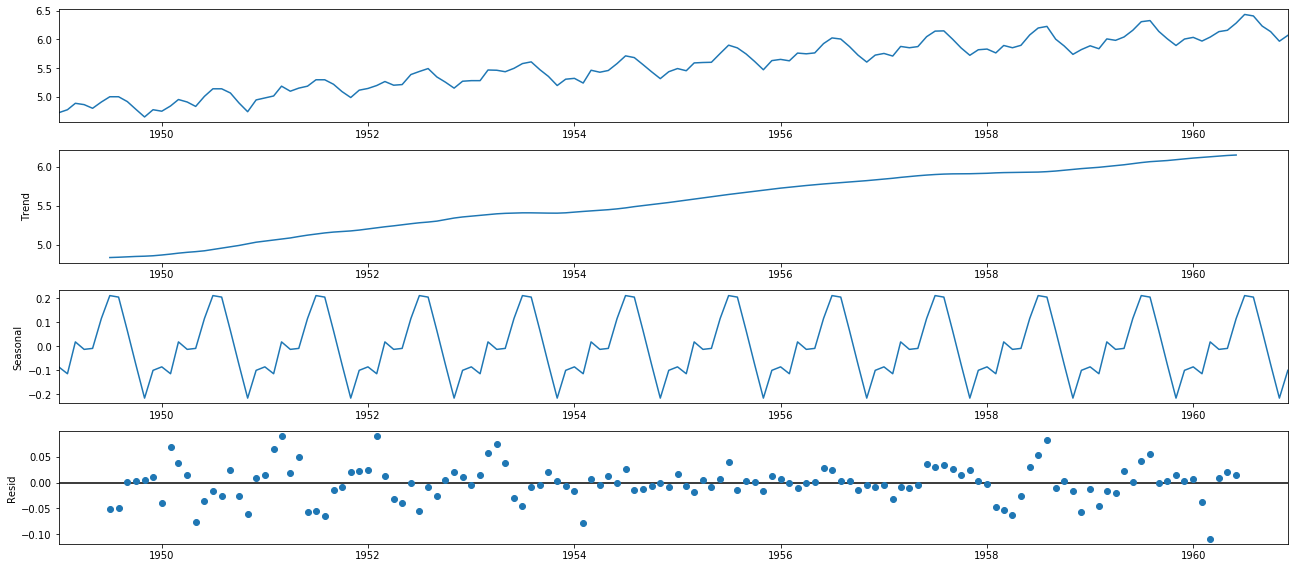

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### AIC 기준으로 model select

In [56]:
df

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [57]:
# seasonal issue 가 12개월로 존재, 대부분 차수 0,1,2 중에서 끝나기 떄문에 모든 변수들의 가능성에 대해서 fitting 해봅니다.

y = df.set_index("Month")

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [58]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1887.1493782738871
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1156.291490150852
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1107.2562043238856
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1109.2437994445115
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1033.61721667297
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1846.078937757151
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1567.9916312318803
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.998361439979
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1072.1382984044333
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1071.002681075534
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1049.580141529183
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1059.5112223290434
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:985.3346478031824
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1405.000661294967
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1194.7130010979697
A

In [59]:
#최적의 값으로 fitting

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285     -1.967      0.049      -1.117      -0.002
ma.S.L12       0.4077      0.336      1.212      0.225      -0.251       1.067
sigma2       140.2869     18.080      7.759      0.000     104.852     175.722


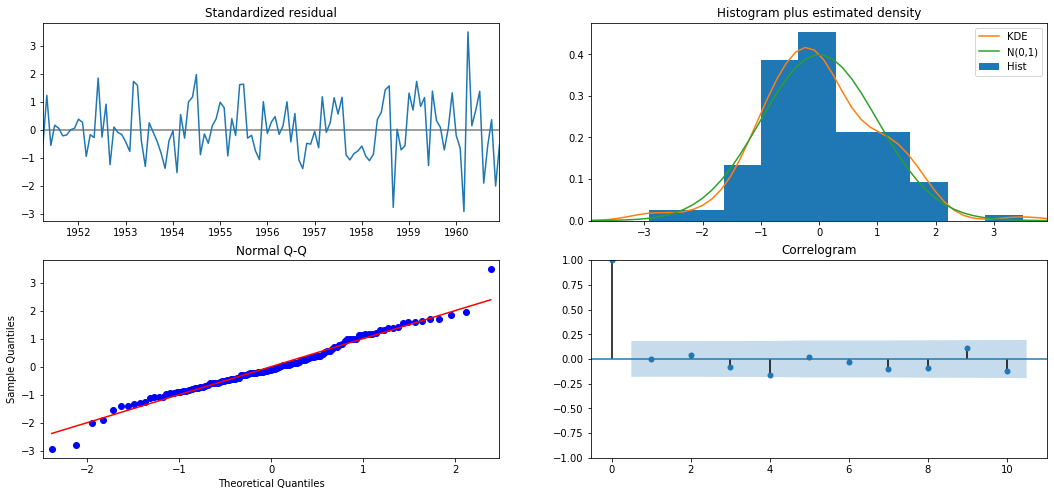

In [60]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

### PREDICT & FORECAST

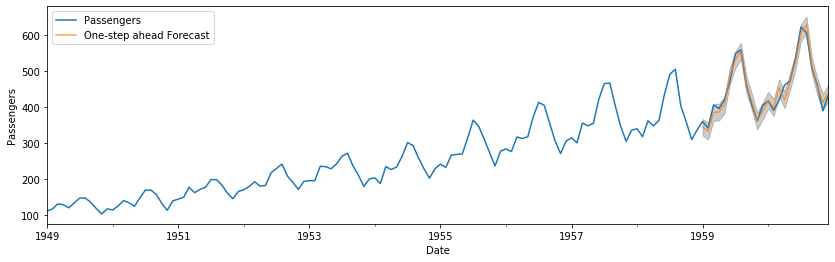

In [61]:
pred = results.get_prediction(start = pd.to_datetime('1959-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [62]:
y_forecasted = pred.predicted_mean
y_truth = y['1959':]
mse = ((y_forecasted - y_truth.Passengers) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 264.06
The Root Mean Squared Error is 16.25


In [63]:
mod = sm.tsa.statespace.SARIMAX(y[:"1958"],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2380      0.092     -2.580      0.010      -0.419      -0.057
ar.S.L12      -0.0006      1.916     -0.000      1.000      -3.757       3.755
ma.S.L12      -0.0458      1.928     -0.024      0.981      -3.824       3.732
sigma2       110.5218     17.428      6.341      0.000      76.363     144.681


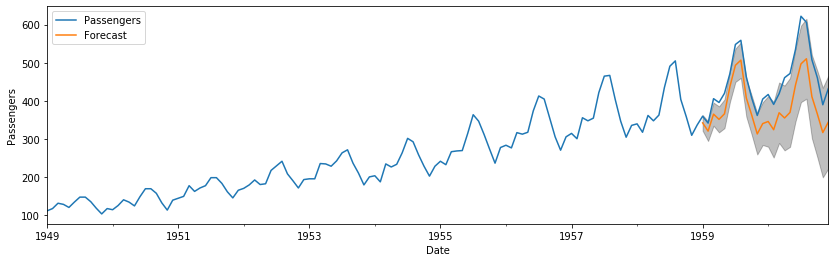

In [64]:
# get_forecast는 예측

pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [65]:
y_forecasted = pred_uc.predicted_mean
y_truth = y['1959':]
mse = ((y_forecasted - y_truth.Passengers) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 5159.25
The Root Mean Squared Error is 71.83


In [66]:
# AIC가 좋은 기준이 아니다.
# one-step prediction에서는 좋은 결과가 나왔지만, 2년을 예측하는 결과에서는 좋지 않은 결과가 나옴.

# 경험상 unit-roots test는 믿을만하지 못하다.

In [67]:
mod = sm.tsa.statespace.SARIMAX(y[:"1958"],
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9691      0.039     24.854      0.000       0.893       1.045
ma.L1         -0.3223      0.081     -3.978      0.000      -0.481      -0.164
ar.S.L12       1.1401      0.020     57.542      0.000       1.101       1.179
ma.S.L12      -0.4026      0.125     -3.212      0.001      -0.648      -0.157
sigma2        80.5544     11.277      7.144      0.000      58.453     102.656


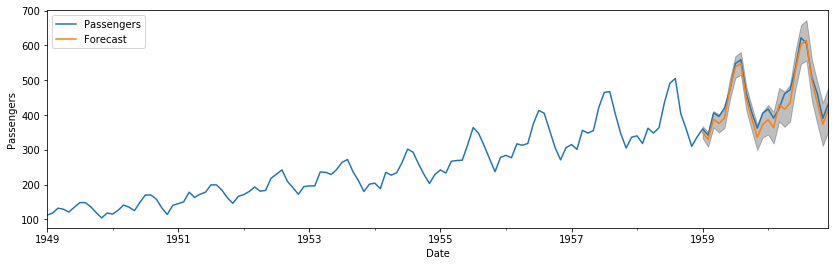

In [68]:
# get_forecast는 예측

pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

In [69]:
y_forecasted = pred_uc.predicted_mean
y_truth = y['1959':]
mse = ((y_forecasted - y_truth.Passengers) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 472.66
The Root Mean Squared Error is 21.74


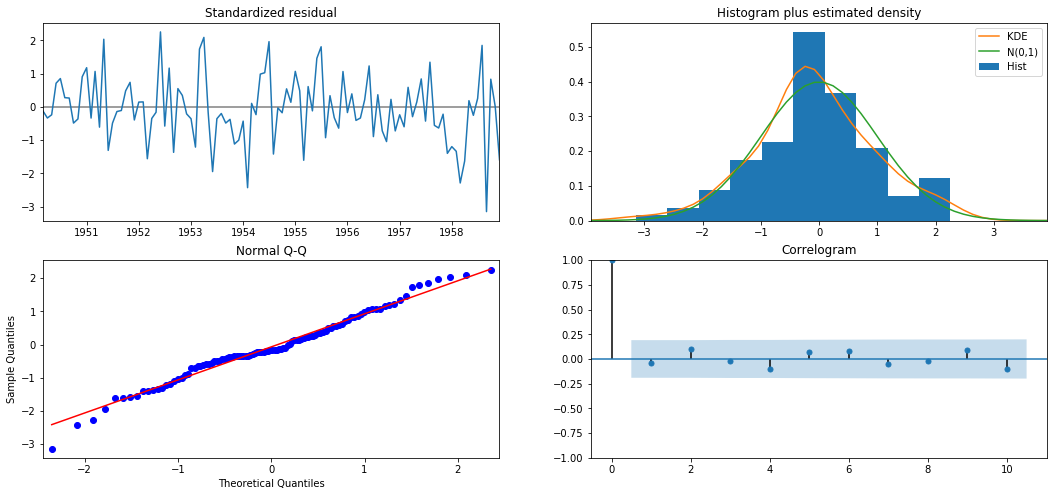

In [70]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [47]:
# (1, 0, 1)(1, 0, 1)12에서 더 좋은 mse를 가지게 되고 예측도 잘함.